<h1 align='center'>Machine Learning Lab</h1>
<h3 align='center'>Lab 04</h3>

### Exercise 0: Dataset preprocessing

#### Importing Packages

In [1]:
import pandas as pd                    #Importing Pandas
import numpy as np                     #Importing Numpy
import seaborn as sns                  #Importing Seaborn
import matplotlib.pyplot as plt        #Importing Matplotlib

#### Reading Tic Tac Toe Dataset

In [2]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data',header=None)

#Replacing the Column names with more descriptive names
tic_tac_toe.columns = ['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square',
                      'middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class']
tic_tac_toe.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


#### Converting any non-numeric values to numeric values.

In [3]:
#Converting the Class column to numeric column using label transformation
tic_tac_toe.loc[:,'Class'] = pd.factorize(tic_tac_toe['Class'])[0].reshape(-1,1)
tic_tac_toe.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,0
1,x,x,x,x,o,o,o,x,o,0
2,x,x,x,x,o,o,o,o,x,0
3,x,x,x,x,o,o,o,b,b,0
4,x,x,x,x,o,o,b,o,b,0


In [4]:
#Converting all the other columns except Class to numeric column using Hot one encoding
tic_tac_toe = pd.get_dummies(tic_tac_toe,columns=tic_tac_toe.columns[:-1])
tic_tac_toe.head()

,Class,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


#### Checking the Data Imbalance and Implementing Stratified Sampling Methodology

##### Plotting the Count Plot of different classes to show how much data imbalance is present

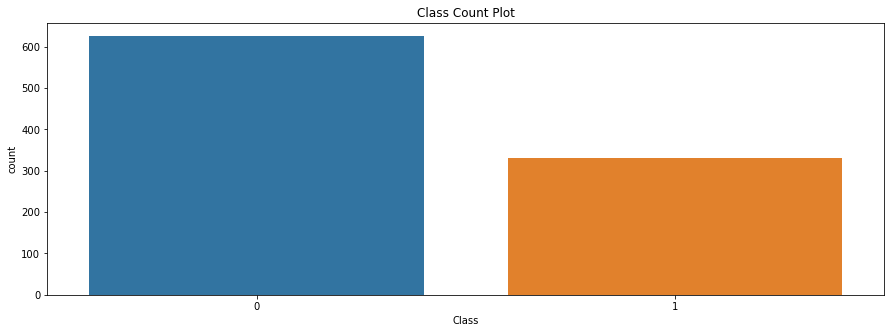

In [5]:
#Using the Count plot from Seaborn to plot frequency of different classes
plt.figure(figsize=(15,5))
sns.countplot(x='Class',data=tic_tac_toe)
plt.title('Class Count Plot')
plt.show()

##### Function to Stratify the dataset and Split it into Train and Test Sets

In [6]:
def stratified_sample_split(df,label,train_size):
    #Finding the minimum number of rows for classes
    min_sample_size = min(df[label].value_counts())
    
    #Sampling Positive and Negative Samples from the dataframe with minimum number of rows for each class
    positive_samples = df[df[label] == 1].sample(n = min_sample_size , replace = False , ignore_index = True)
    negative_samples = df[df[label] == 0].sample(n = min_sample_size , replace = False , ignore_index = True)
    
    #Combining both Positive and Negative classes to a single stratified Dataframe
    stratified_df = pd.concat([positive_samples,negative_samples],ignore_index=True)
    
    #Shuffling the rows randomly in the stratified dataframe to make data Randomized
    stratified_df = stratified_df.sample(frac = 1).reset_index(drop = True)
    
    #Creating X matrix by removing the label/Target column
    X = stratified_df.drop(label,axis=1)
    
    #Creating Y vector which include only the Label/Target Column
    Y = stratified_df[label].to_numpy()
    
    #Adding a Bias Column in the X Matrix
    X = np.append(np.ones(shape=(len(X),1)),X,axis=1)
    
    #Calculating number of rows to be copied in the Training Set according to specific ratio
    total_rows_train = int(len(X)*train_size)
    
    #Splitting the Dataset into Training set and Test Set based on calculated rows
    X_train , X_test = X[:total_rows_train,:] , X[total_rows_train:,:]
    Y_train , Y_test = Y[:total_rows_train].reshape(-1,1) , Y[total_rows_train:].reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test

##### Spliting Tic Tac Toe Dataset on 80:20 percent Ratio

In [7]:
X_train, Y_train, X_test, Y_test = stratified_sample_split(tic_tac_toe,'Class',0.8)

### Exercise 1: Logistic Regression with Gradient Ascent

In [8]:
#Initializing arrays to store loss difference and Log loss values in different number of Iterations
ga_loss_difference_values = np.array([])
ga_logloss_values = np.array([])
newton_loss_difference_values = np.array([])
newton_logloss_values = np.array([])

#### Function to calculate the sigmoid of the given vector

In [9]:
def sigmoid_function(x):
    # sigmoid(x) = 1 / (1 + e^-x)
    return (1 / (1 + np.exp(np.negative(x))))

#### Function to calculate the Loglikelihood Loss

In [10]:
def loglikelihood_loss(X,Y,B):
    # L = summation((Y - Y_pred) - log(1 + e^Y_pred))
    return np.sum((Y * sigmoid_function(X @ B)) - np.log(1 + np.exp(sigmoid_function(X @ B))))

#### Function to calculate the Loglikelihood loss difference between current Beta and previous Beta

In [11]:
def loss_difference(X,Y,B_old,B_new):
    # |L(B_old) - L(B_new)|
    return np.abs(loglikelihood_loss(X,Y,B_old) - loglikelihood_loss(X,Y,B_new))

#### Function to calculate the log absolute loss of predicted Y

In [12]:
def log_loss(X,Y,B):
    # Log Loss = |loglokelihood_loss(X,Y,B)|
    return np.abs(loglikelihood_loss(X,Y,B))

#### Function which returns the gradient of Loss function

In [13]:
def dL(X,Y,B):
    # Derivative of Loss = X^T * (Y - Y_pred)
    return X.T @ (np.subtract(Y,sigmoid_function(X @ B)))

#### Function to calculate optimum learning rate using Bold Driver Algorithm

In [14]:
def steplength_bolddriver(X,Y,B,alpha_old,alpha_plus,alpha_minus):
    #Increasing alpha value using alpha+
    alpha = alpha_old*alpha_plus
    
    #Iterating until following condition is meet:
    #f(x + µd) - f(x) < 0
    while(loglikelihood_loss(X,Y,B + (alpha * dL(X,Y,B))) - loglikelihood_loss(X,Y,B) < 0):
        #Slowly Increasing alpha using alpha-
        alpha = alpha * alpha_minus
    return alpha

#### Function to Maximize the Gradient Ascent based on Total Iterations and Learning Rate using Bold Driver Algorithm

In [15]:
def learn_logreg_GA(X_train,Y_train,X_test,Y_test,imax,epsilon):
    #Using global arrays to store loss difference and rmse values for different Iterations
    global ga_loss_difference_values , ga_logloss_values
    
    #Emptying both Loss difference and RMSE arrays
    ga_loss_difference_values , ga_logloss_values = np.array([]) , np.array([])
    
    #Initializing beta vector with zeros
    beta = np.zeros(shape=(len(X_train[0]),1))
    
    #Initializing initial alpha value for Bold Driver algorithm
    alpha = 5e-5
    for i in range(imax):
        #Calculating new alpha/step length value using Bold Driver Algorithm
        alpha = steplength_bolddriver(X_train,Y_train,beta,alpha,1,0.5)
        
        #Calculating new Beta values from previous beta values and gradient ascent direction
        #Beta = Beta + learning_rate * gradient ascent based on Beta
        beta_ = beta + (alpha * dL(X_train,Y_train,beta))
        
         #Appending Loss difference between between previous and new Beta
        ga_loss_difference_values = np.append(ga_loss_difference_values,loss_difference(X_train,Y_train,beta,beta_))
        
        #Appending RMSE loss between actual Y and Predicted Y
        ga_logloss_values = np.append(ga_logloss_values,log_loss(X_test,Y_test,beta_))
        
        #Checking the Stopping Condition by comparing loss on previous and current beta
        if loglikelihood_loss(X_train,Y_train,beta_) - loglikelihood_loss(X_train,Y_train,beta) < epsilon:
            return beta_
        
        #Copying new Beta value to old Beta value for Further Calculation
        beta = np.copy(beta_)
    return beta_

#### Calculating new Beta values using gradient ascent function and 1000 iterations

In [16]:
beta = learn_logreg_GA(X_train,Y_train,X_test,Y_test,1000,10**-5)

#### Plotting Loss difference and Log loss after Gradient Ascent

##### Graph of Loss Difference

Text(0, 0.5, 'Loss Difference')

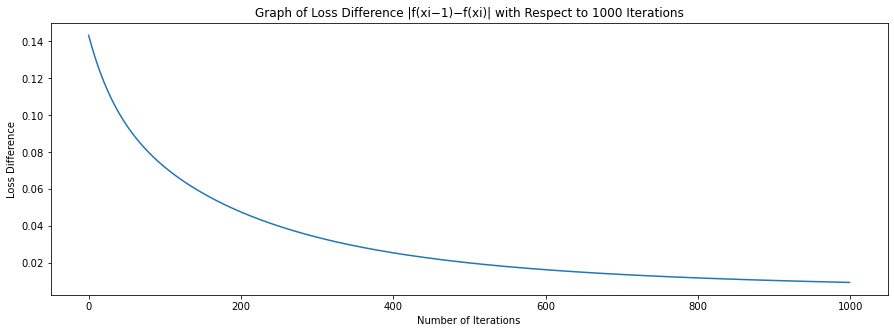

In [17]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(ga_loss_difference_values))],ga_loss_difference_values)
ax.set_title('Graph of Loss Difference |f(xi−1)−f(xi)| with Respect to 1000 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loss Difference')

##### Graph of Log Loss

Text(0, 0.5, 'Log Loss')

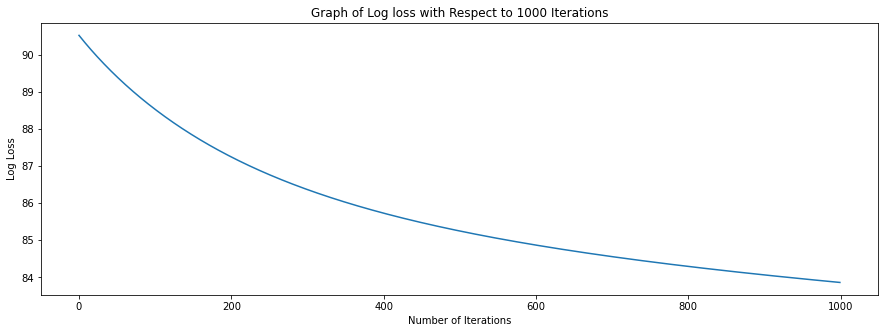

In [18]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(ga_logloss_values))],ga_logloss_values)
ax.set_title('Graph of Log loss with Respect to 1000 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Log Loss')

### Exercise 2: Implement Newton Algorithm for Logistic Regression

#### Function to find Local Minima Using Newton's Algorithm for Logistic  Regression

In [19]:
def minimize_newton(X,Y,imax,epsilon):
    #Using global arrays to store loss difference and rmse values for different Iterations
    global newton_loss_difference_values , newton_logloss_values
    
    #Emptying both Loss difference and RMSE arrays
    newton_loss_difference_values , newton_logloss_values = np.array([]) , np.array([])
    
    #Initializing beta with Zeros
    beta = np.zeros(shape=(len(X[0]),1))
    for i in range(imax):
        #Calculating the Inverse of Hessian Matrix
        #W = diagonal(Y_pred . (1 - Y_pred))
        W = np.diag(sigmoid_function(X @ beta.reshape(1,-1)[0]) * (1 - sigmoid_function(X @ beta.reshape(1,-1)[0])))
        
        #H = X^T * W * X
        H = X.T.dot(W).dot(X)
        
        #H^-1 = inv(H)
        H_inv = np.linalg.inv(H)
        
        #Calculating new Beta values from previous beta values and Newton's Hessian matrix
        #Beta = Beta - learning_rate * Hessian Matrix * gradient ascent based on Beta
        beta_ = beta + (0.0001 * (H_inv @ dL(X,Y,beta)))
        
         #Appending Loss difference between between previous and new Beta
        newton_loss_difference_values = np.append(newton_loss_difference_values,loss_difference(X,Y,beta,beta_))
        
        #Appending Log loss for Predicted Y
        newton_logloss_values = np.append(newton_logloss_values,log_loss(X_test,Y_test,beta_))
        
        #Checking the Stopping Condition by comparing loss on previous and current beta
        if loglikelihood_loss(X_train,Y_train,beta_) - loglikelihood_loss(X_train,Y_train,beta) < epsilon:
            return beta_
        
        #Copying new Beta value to old Beta value for Further Calculation
        beta = np.copy(beta_)
    return beta_

#### Calculating new Beta values using Newton's Algorithm and 100 iterations

In [20]:
beta = minimize_newton(X_train,Y_train,100,10**-5)

#### Plotting Loss difference and Log loss after Newton's Algorithm

Text(0, 0.5, 'Loss Difference')

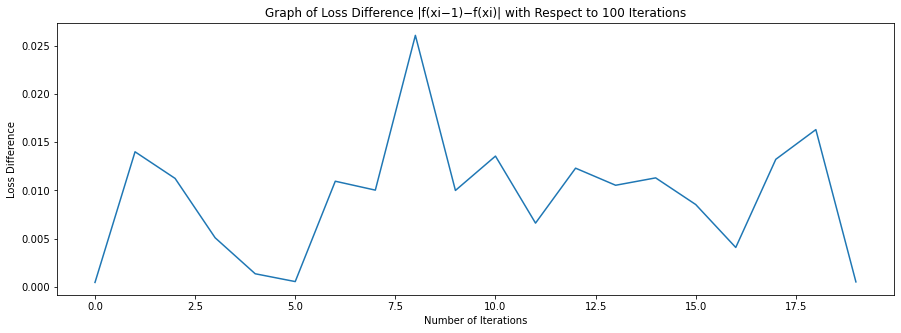

In [21]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(newton_loss_difference_values))],newton_loss_difference_values)
ax.set_title('Graph of Loss Difference |f(xi−1)−f(xi)| with Respect to 100 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loss Difference')

Text(0, 0.5, 'Log Loss')

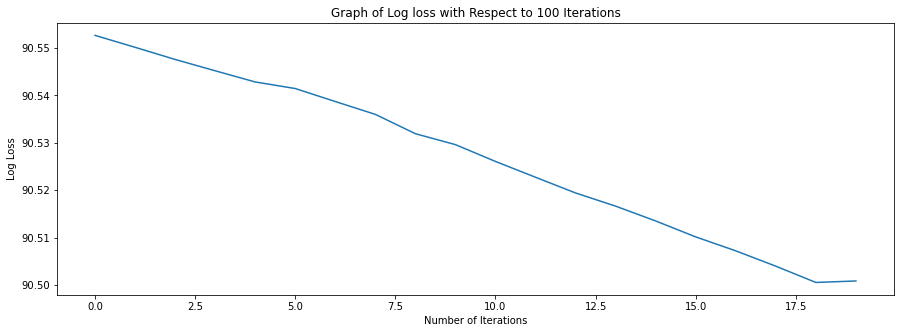

In [22]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(newton_logloss_values))],newton_logloss_values)
ax.set_title('Graph of Log loss with Respect to 100 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Log Loss')

#### Comments on the rate of convergence in the light of plots from above

Text(0, 0.5, 'Log Loss')

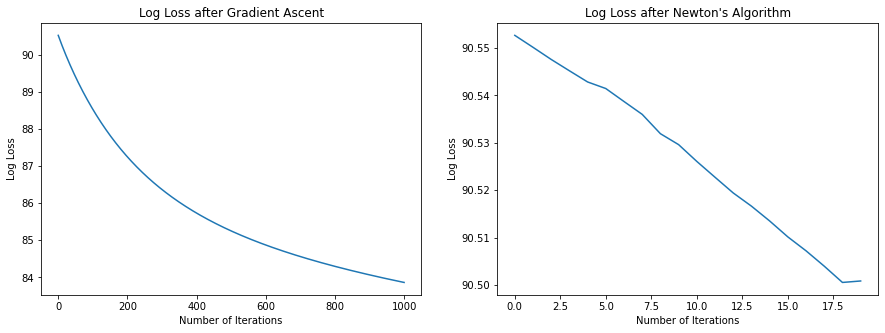

In [23]:
#Plotting Log Loss after Gradient Ascent
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.plot([i for i in range(len(ga_logloss_values))],ga_logloss_values)
ax.set_title('Log Loss after Gradient Ascent')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Log Loss')

#Plotting Log Loss after Newton's Algorithm
ax1 = fig.add_subplot(122)
ax1.plot([i for i in range(len(newton_logloss_values))],newton_logloss_values)
ax1.set_title('Log Loss after Newton\'s Algorithm')
ax1.set_xlabel('Number of Iterations')
ax1.set_ylabel('Log Loss')